In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing

In [2]:
df= pd.read_csv("WGEM-IND_CPTOTNSXN.csv", index_col=0)
df.head()

,Value
Date,
31-12-1987,19.448655
31-12-1988,21.274000
31-12-1989,21.967677
31-12-1990,23.939126
31-12-1991,27.259261


In [3]:

y = df['Value']
y_train = y[:-4]
y_test = y[-4:]
y_train.shape, y_test.shape

((27,), (4,))

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


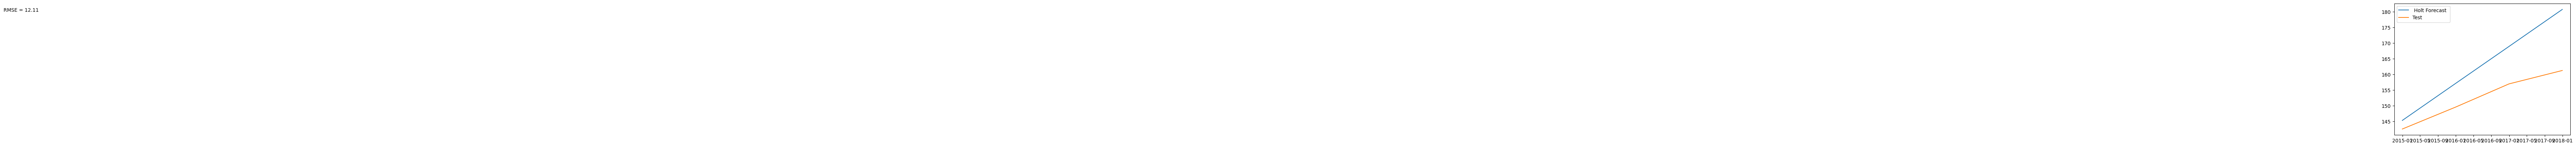

In [28]:
holt = Holt(y_train)
fit1= holt.fit()
fcast1 = fit1.forecast(len(y_test))

holt_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,holt_fcast),2)
holt_fcast.index= y_test.index

plt.text(0.25,180,"RMSE = "+str(error))
plt.plot(holt_fcast,label=" Holt Forecast ")
plt.plot(y_test,label="Test")
plt.legend(loc='best')
plt.show()

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


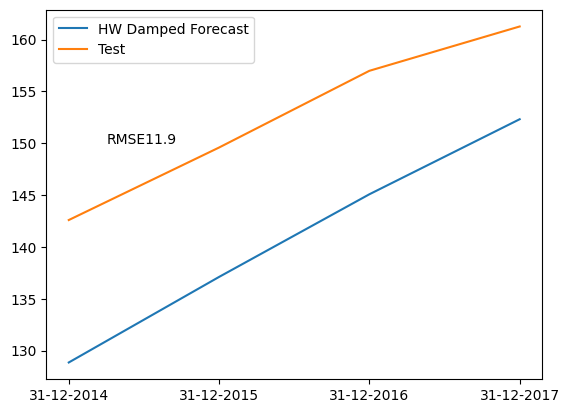

In [21]:
alpha,beta,gamma=0.2,0.5,0.2
hw_ml = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')
fit3 = hw_ml.fit(smoothing_level= alpha, smoothing_trend=beta, smoothing_seasonal = gamma)
fcast3=fit3.forecast(len(y_test))
hw_ml_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_ml_fcast) ,2)
y_test.index= hw_ml_fcast.index
plt.text(0.25,150,"RMSE"+str(error))
plt.plot(hw_ml_fcast,label='HW Damped Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

In [24]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.240, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.766, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=92.810, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.165, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.712, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=91.639, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=93.617, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.667 seconds


In [ ]:
y_pred= model.predict(n_periods=len(y_test))
error = round(root_mean_squared_error(y_test,hw_ml_fcast) ,2)
y_test.index= hw_ml_fcast.index
plt.text(0.25,150,"RMSE"+str(error))
plt.plot(hw_ml_fcast,label='HW Damped Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()


In [25]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)

15.240717754968092

<function matplotlib.pyplot.show(close=None, block=None)>

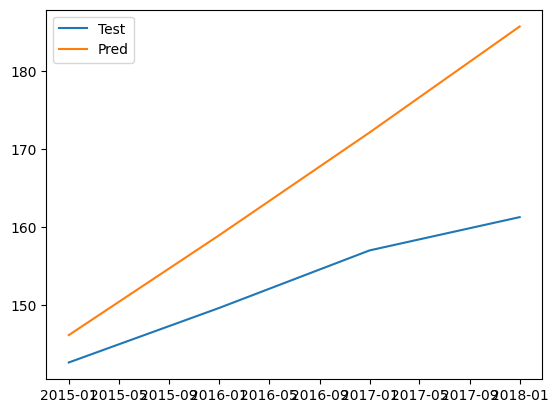

In [26]:
y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show


In [36]:
# Predicting for next 3 Years

In [29]:
holt = Holt(y)
fit1= holt.fit()
fcast1 = fit1.forecast(3)
fcast1


C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


2018-12-31    166.180982
2019-12-31    170.880303
2020-12-31    175.579624
Freq: YE-DEC, dtype: float64

In [35]:
pd.DatetimeIndex(y, yearfirst=True)

DatetimeIndex(['1970-01-01 00:00:00.000000019',
               '1970-01-01 00:00:00.000000021',
               '1970-01-01 00:00:00.000000021',
               '1970-01-01 00:00:00.000000023',
               '1970-01-01 00:00:00.000000027',
               '1970-01-01 00:00:00.000000030',
               '1970-01-01 00:00:00.000000032',
               '1970-01-01 00:00:00.000000035',
               '1970-01-01 00:00:00.000000039',
               '1970-01-01 00:00:00.000000042',
               '1970-01-01 00:00:00.000000045',
               '1970-01-01 00:00:00.000000052',
               '1970-01-01 00:00:00.000000054',
               '1970-01-01 00:00:00.000000056',
               '1970-01-01 00:00:00.000000058',
               '1970-01-01 00:00:00.000000061',
               '1970-01-01 00:00:00.000000064',
               '1970-01-01 00:00:00.000000066',
               '1970-01-01 00:00:00.000000069',
               '1970-01-01 00:00:00.000000073',
               '1970-01-01 00:00:00.0000

ConversionError: Failed to convert value(s) to axis units: array([Period('2018', 'Y-DEC'), Period('2019', 'Y-DEC'),
       Period('2020', 'Y-DEC')], dtype=object)

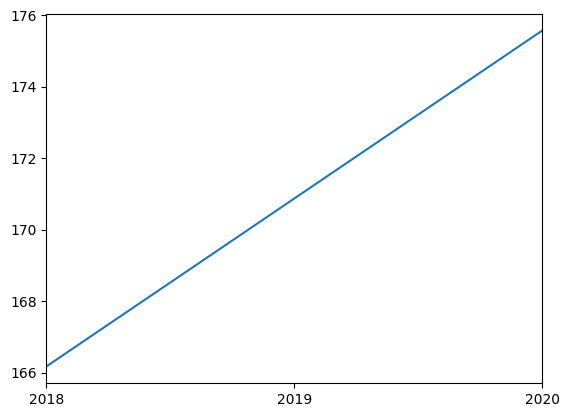

In [37]:
y= df['Value']
fcast1.plot(label=" Holt Forecast ")
y.plot(label="Data")
plt.legend(loc='best')
plt.show()